This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.

In [1]:
# Importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
#reading a dataset
df = pd.read_csv('temperature.csv')
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


there are two target variables here: 

1) Next_Tmax: Next day maximum temperature

2) Next_Tmin: Next day  minimum temperature



In [25]:
#to check how many rows and columns in dataframe
df.shape

(7752, 25)

In [26]:
df.duplicated().sum()  #to check with duplicate records

0

In [27]:
#to get the info of this dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


with above details,we can observe all the datatypes of each column along with memory consumption of dataset

In [28]:
#convertng date into day,month and year columns 

df['Date'] = pd.to_datetime(df['Date'], errors='coerce') #converting to a datetime type

df['Year']  = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day']   = df['Date'].dt.day

In [29]:
#droping the "date" column

df = df.drop(["Date"],axis=1)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Present_Tmax      7682 non-null   float64
 2   Present_Tmin      7682 non-null   float64
 3   LDAPS_RHmin       7677 non-null   float64
 4   LDAPS_RHmax       7677 non-null   float64
 5   LDAPS_Tmax_lapse  7677 non-null   float64
 6   LDAPS_Tmin_lapse  7677 non-null   float64
 7   LDAPS_WS          7677 non-null   float64
 8   LDAPS_LH          7677 non-null   float64
 9   LDAPS_CC1         7677 non-null   float64
 10  LDAPS_CC2         7677 non-null   float64
 11  LDAPS_CC3         7677 non-null   float64
 12  LDAPS_CC4         7677 non-null   float64
 13  LDAPS_PPT1        7677 non-null   float64
 14  LDAPS_PPT2        7677 non-null   float64
 15  LDAPS_PPT3        7677 non-null   float64
 16  LDAPS_PPT4        7677 non-null   float64


So,now all columns are having a float datatype

In [31]:
#to get statistics information
df.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Year,Month,Day
count,7750.000000,7682.000000,7682.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7725.000000,7725.000000,7750.000000,7750.000000,7750.000000
mean,13.000000,29.768211,23.225059,56.759372,88.374804,29.613447,23.512589,7.097875,62.505019,0.368774,0.356080,0.318404,0.299191,0.591995,0.485003,0.278200,0.269407,37.544722,126.991397,61.867972,1.257048,5341.502803,30.274887,22.932220,2015.000000,7.080645,16.370968
std,7.211568,2.969999,2.413961,14.668111,7.192004,2.947191,2.345347,2.183836,33.730589,0.262458,0.258061,0.250362,0.254348,1.945768,1.762807,1.161809,1.206214,0.050352,0.079435,54.279780,1.370444,429.158867,3.128010,2.487613,1.414305,2.238364,8.241331
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000,2013.000000,1.000000,7.000000
25%,7.000000,27.800000,21.700000,45.963543,84.222862,27.673499,22.089739,5.678705,37.266753,0.146654,0.140615,0.101388,0.081532,0.000000,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.300000,2014.000000,7.000000,8.000000
50%,13.000000,29.900000,23.400000,55.039024,89.793480,29.703426,23.760199,6.547470,56.865482,0.315697,0.312421,0.262555,0.227664,0.000000,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000,2015.000000,7.000000,16.000000
75%,19.000000,32.000000,24.900000,67.190056,93.743629,31.710450,25.152909,8.032276,84.223616,0.575489,0.558694,0.496703,0.499489,0.052525,0.018364,0.007896,0.000041,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000,2016.000000,8.000000,24.000000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,0.968353,0.983789,0.974710,23.701544,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000,2017.000000,12.000000,31.000000


with above information,we can see there no missing values in any column and we can also observe the fact that many columns contains a minimum value of even 0 value,which means the value can even go with zero amount as well.

In [32]:
#to check whether any null values present in dataframe
df.isnull().sum()

station              2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
Year                 2
Month                2
Day                  2
dtype: int64

Since the dataset is big enough to build a model,so we afford to drop these null values containing rows from dataset.

In [33]:
df = df.dropna()

In [34]:
df.isnull().sum()

station             0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
Year                0
Month               0
Day                 0
dtype: int64

In [35]:
#droping the "station" column from dataset

df = df.drop(['station'],axis=1)

In [36]:
# #droping the unwanted columns like "lat","lon","DEM","Slope","Solar radation" from dataframe

# df = df.drop(["lat","lon","DEM","Slope","Solar radiation"],axis=1)

So,now there are no null values in it.

## EDA

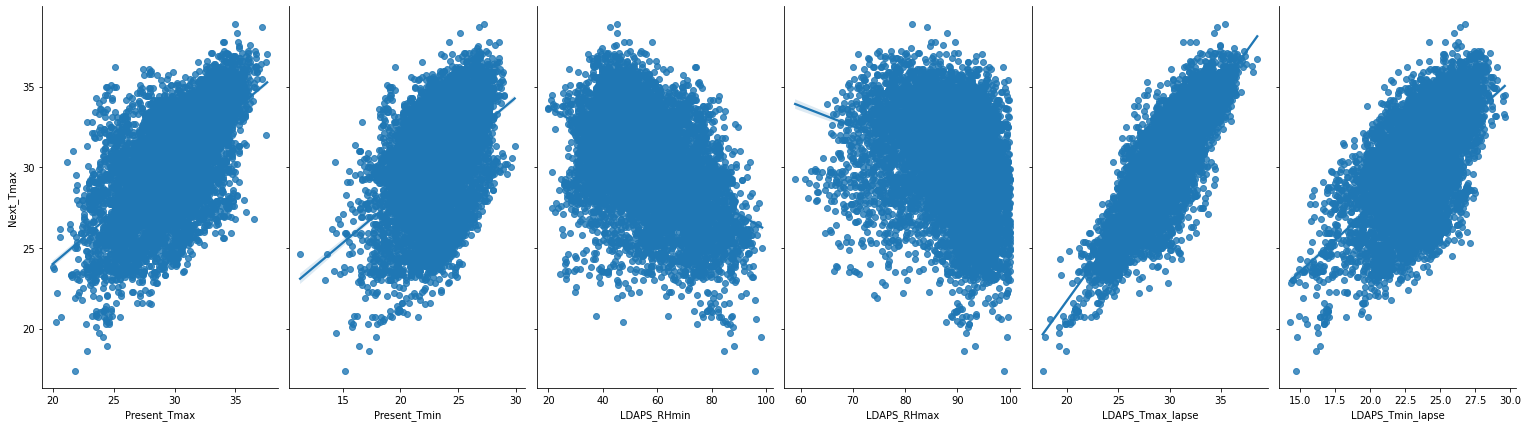

In [52]:
#Since the data is continuous for multiple columns so we use Pairplot 
#1) for "Next_Tmax"

sns.pairplot(df, x_vars=['Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin','LDAPS_RHmax','LDAPS_Tmax_lapse','LDAPS_Tmin_lapse'],
             y_vars='Next_Tmax',height=6, aspect=0.6, kind='reg')

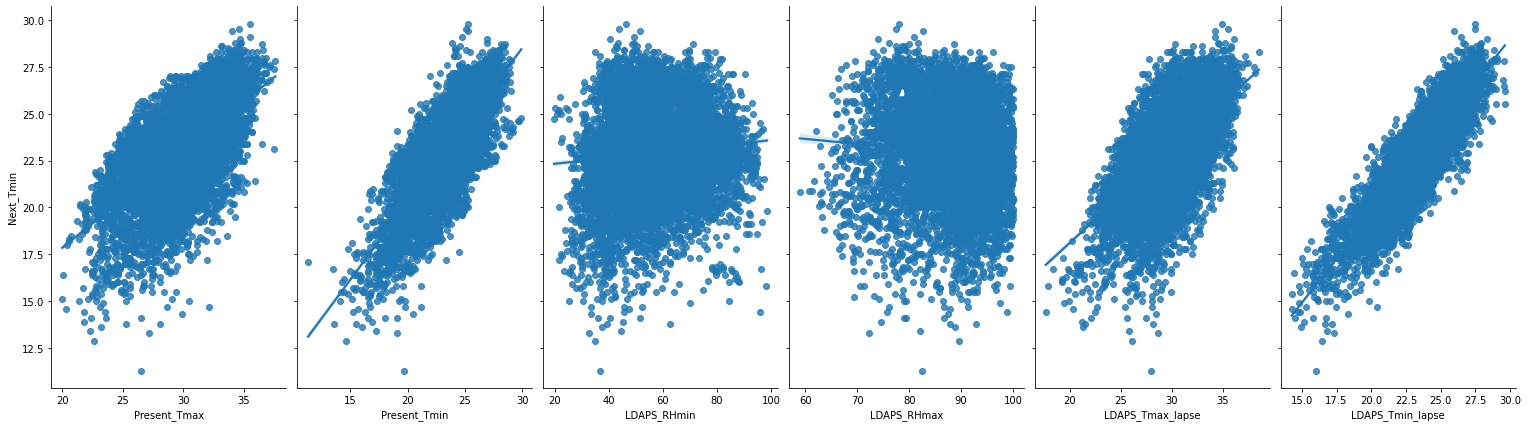

In [53]:
#2)for "Next_Tmin"

sns.pairplot(df, x_vars=['Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin','LDAPS_RHmax','LDAPS_Tmax_lapse','LDAPS_Tmin_lapse'],
             y_vars='Next_Tmin',height=6, aspect=0.6, kind='reg')

#### with above observation ,its clear that most of the above factors affecting in a similar way for both target variables.

#### 1)both target variables are linearly increasing w.r.t columns like "Present_Tmax","Present_Tmin","LDAPS_Tmax_lapse","LDAPS_Tmin_lapse".

#### 2)"Next_Tmax" is linearly decreasng w.r.t columns like "LDAPS_RHmin","LDAPS_RHmax".

#### 3)Next_Tmin is slightly increasing w.r.t "LDAPS_RHmin" and slighly decreasing w.r.t "LDAPS_RHmax".


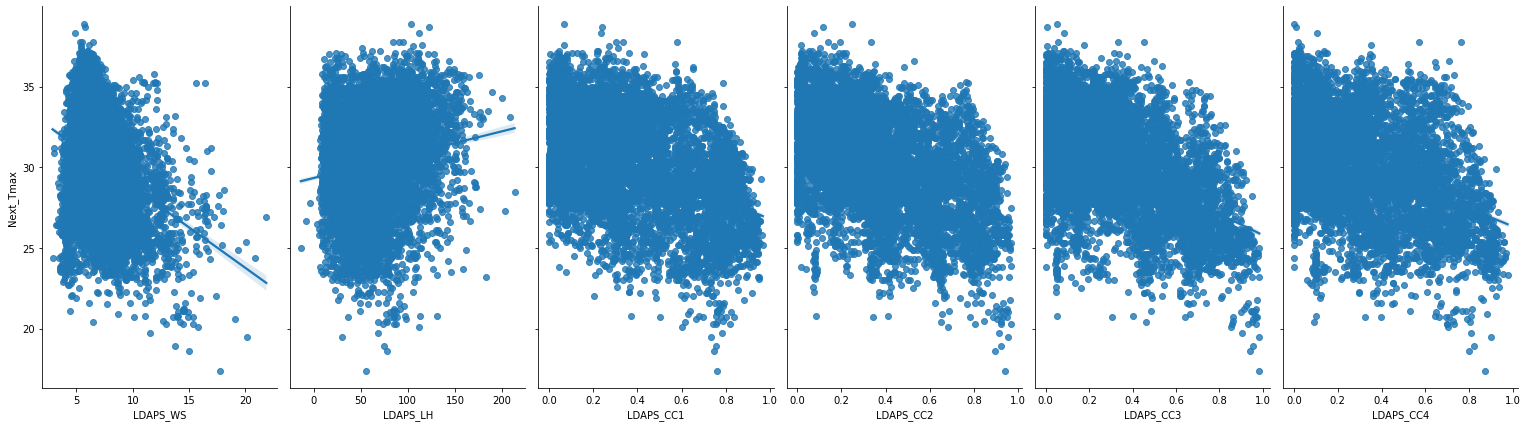

In [56]:
#1) for "Next_Tmax"

sns.pairplot(df, x_vars=['LDAPS_WS', 'LDAPS_LH', 'LDAPS_CC1','LDAPS_CC2','LDAPS_CC3','LDAPS_CC4'],
             y_vars='Next_Tmax',height=6, aspect=0.6, kind='reg')

#### "Next_Tmax" is slightly decreasing w.r.t all above columns except for "LDAPS_LH" in which its slightly increasing.

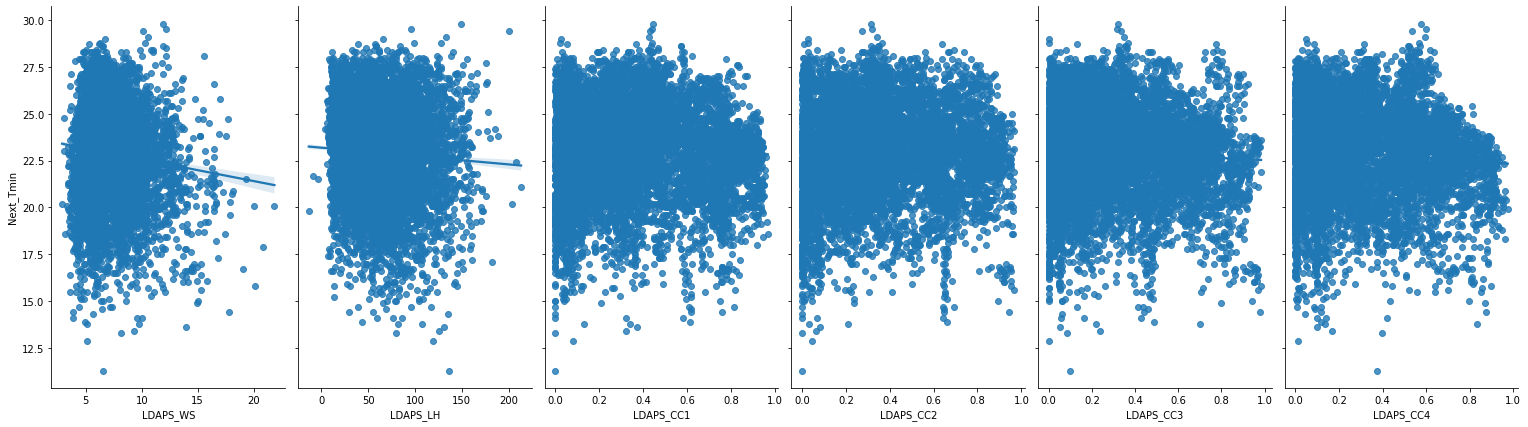

In [57]:
#2) for "Next_Tmin"

sns.pairplot(df, x_vars=['LDAPS_WS', 'LDAPS_LH', 'LDAPS_CC1','LDAPS_CC2','LDAPS_CC3','LDAPS_CC4'],
             y_vars='Next_Tmin',height=6, aspect=0.6, kind='reg')

#### "Next_Tmin" value is uncertain for all above columns except for "LDAPS_WS","LDAPS_LH" where its slightly decreasing.

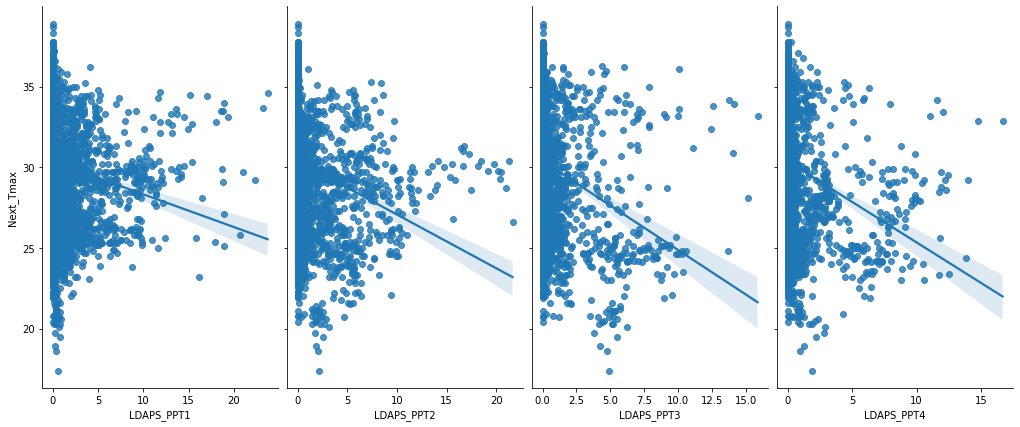

In [59]:
#1) for "Next_Tmax"


sns.pairplot(df, x_vars=['LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3','LDAPS_PPT4'],
             y_vars='Next_Tmax',height=6, aspect=0.6, kind='reg')

#### Next_Tmax is slightly decreasing w.r.t all above columns.

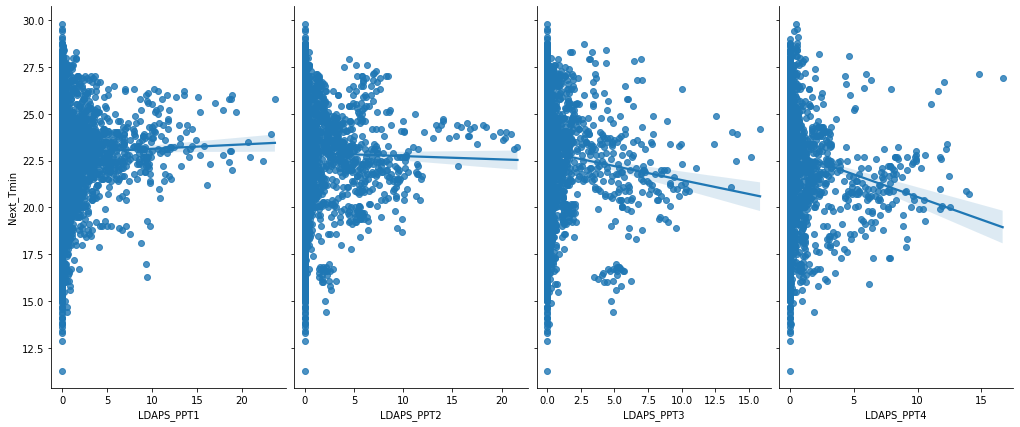

In [60]:
#1) for "Next_Tmin"


sns.pairplot(df, x_vars=['LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3','LDAPS_PPT4'],
             y_vars='Next_Tmin',height=6, aspect=0.6, kind='reg')

#### "Next_Tmin" is slghtly decreasing for "LDAPS_PPT3" ,"LDAPS_PPT4" and values are uncertain in case of other two columns.

In [55]:
df.columns

Index(['Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation', 'Next_Tmax', 'Next_Tmin', 'Year', 'Month', 'Day'],
      dtype='object')

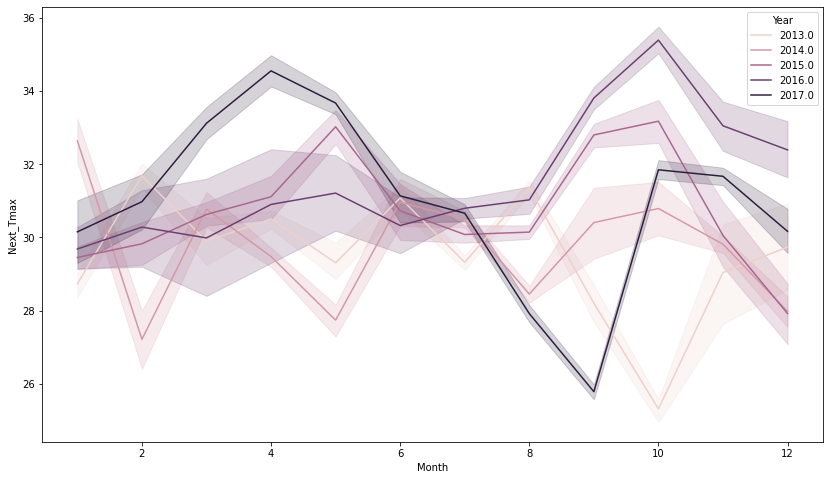

In [63]:
#for Next_Tmax
#using lineplot
plt.figure(figsize=(14,8))
sns.lineplot(x="Month", y="Next_Tmax", hue='Year', data=df)
plt.show()

So,there is peak temperature for between months of 9-10 in every year with exception of raise in months of 3-4 as well.
and minimum temperature has been observed in month of 10 of 2013 year.

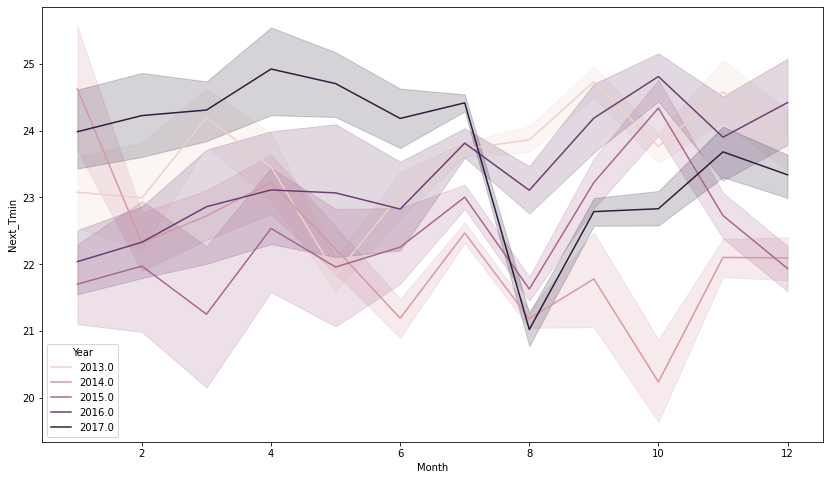

In [64]:
#for Next_Tmin
#using lineplot
plt.figure(figsize=(14,8))
sns.lineplot(x="Month", y="Next_Tmin", hue='Year', data=df)
plt.show()

So,there is peak temperature for between months of 3-4 in every year with exception raise in months of 9-10 as well.
and minimum temperature has been observed in month of 10 of 2013 year.

### Correlation

In [65]:
#w.r.t "Next_Tmax"

df.corr()['Next_Tmax'].sort_values()

LDAPS_CC3          -0.523061
LDAPS_CC2          -0.498295
LDAPS_CC1          -0.459705
LDAPS_CC4          -0.454039
LDAPS_RHmin        -0.446824
LDAPS_WS           -0.351107
LDAPS_RHmax        -0.289788
LDAPS_PPT3         -0.203554
LDAPS_PPT4         -0.190720
LDAPS_PPT2         -0.186722
DEM                -0.174578
LDAPS_PPT1         -0.125954
Day                -0.122303
Slope              -0.104279
lat                -0.055367
Month              -0.033684
lon                 0.003502
Solar radiation     0.016145
Year                0.061211
LDAPS_LH            0.156779
Present_Tmin        0.463523
LDAPS_Tmin_lapse    0.592119
Present_Tmax        0.610357
Next_Tmin           0.616629
LDAPS_Tmax_lapse    0.835729
Next_Tmax           1.000000
Name: Next_Tmax, dtype: float64

In [69]:
#w.r.t "Next_Tmin"

df.corr()['Next_Tmin'].sort_values()

DEM                -0.249303
Slope              -0.148379
Day                -0.135865
LDAPS_PPT4         -0.114900
LDAPS_WS           -0.102021
LDAPS_CC4          -0.086197
lat                -0.085136
LDAPS_RHmax        -0.076415
LDAPS_PPT3         -0.068664
LDAPS_LH           -0.060392
LDAPS_CC3          -0.056490
lon                -0.045758
Month              -0.028344
LDAPS_CC1          -0.012877
LDAPS_PPT2         -0.012462
LDAPS_PPT1          0.018031
Year                0.021617
LDAPS_CC2           0.030358
LDAPS_RHmin         0.093249
Solar radiation     0.125517
LDAPS_Tmax_lapse    0.589963
Next_Tmax           0.616629
Present_Tmax        0.621048
Present_Tmin        0.796975
LDAPS_Tmin_lapse    0.886513
Next_Tmin           1.000000
Name: Next_Tmin, dtype: float64

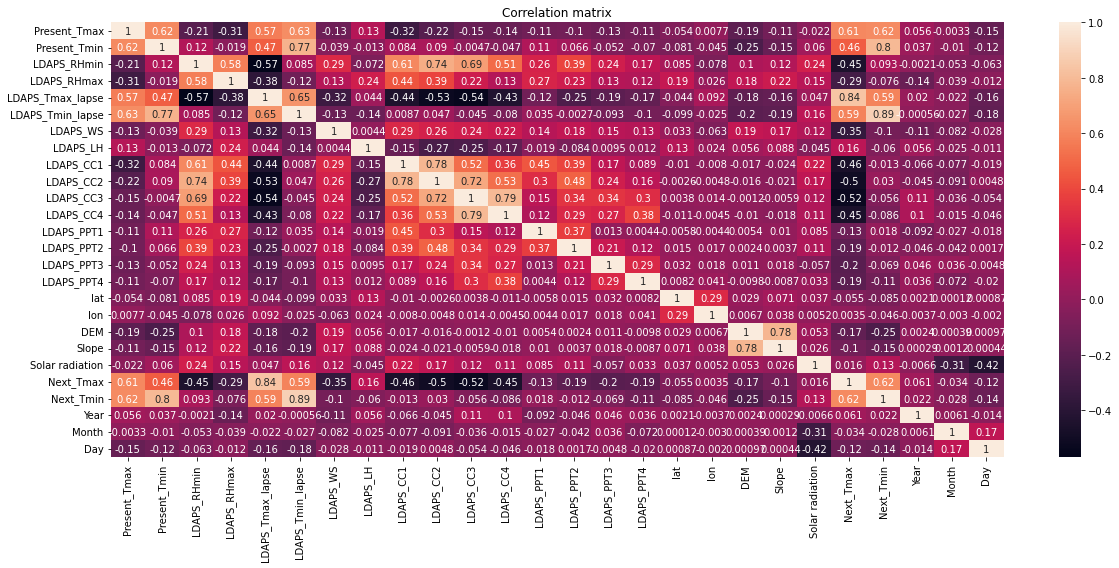

In [70]:
#plotting the correlation matrix using heatmap

corr_matrix = df.corr()
plt.figure(figsize=[20,8])
sns.heatmap(corr_matrix,annot=True)
plt.title("Correlation matrix")
plt.show()

### With above observation,both postive and negative correlation as been observed for both target variables,
#### for a) "Next_Tmax"
#### i) "LDAPS_CC3" has highest negative corrleation(52%) w.r.t "Next_Tmax".
#### ii) "Month" has least negative corrleation(3%) w.r.t "Next_Tmax".
#### iii) "lon" has least positive corrleation(less then 1%) w.r.t "Next_Tmax".
#### iv) "LDAPS_Tmax_lapse" has highest positive corrleation(83%) w.r.t "Next_Tmax".



---



---


#### for b) "Next_Tmin"
#### i) "DEM" has highest negative corrleation(25%) w.r.t "Next_Tmin".
#### ii) "LDAPS_PPT2" has least negative corrleation(1%) w.r.t "Next_Tmin".
#### iii) "LDAPS_PPT1" has least positive corrleation(2%) w.r.t "Next_Tmin".
#### iv) "LDAPS_Tmin_lapse" has highest positive corrleation(88%) w.r.t "Next_Tmin".

### Checking with outliers

In [77]:
df1 = df.iloc[:,:8]
df2 = df.iloc[:,8:16]
df3 = df.iloc[:,16:]

In [78]:
import warnings
warnings.filterwarnings('ignore') #to remove warning messages

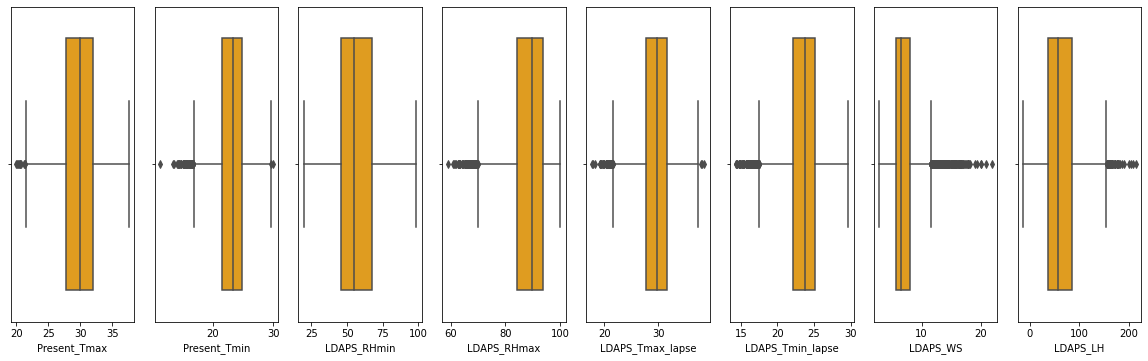

In [79]:
column_list = df1.columns.values
n_col = 31
n_row = 25
plt.figure(figsize = (2*n_col,4*n_col))
for i in range(len(column_list)):
  plt.subplot(n_row,n_col,i+1)
  sns.boxplot(df[column_list[i]],color='orange',orient='h')
  plt.tight_layout()

So,few outliers are present n all most all columns.

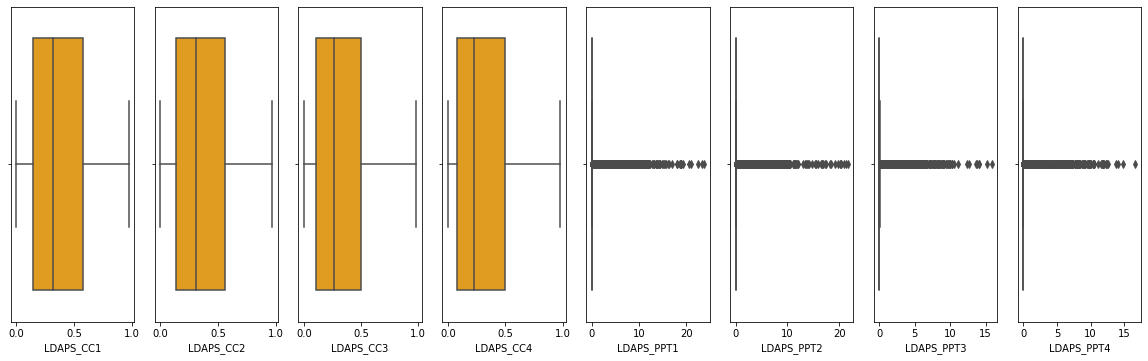

In [80]:
column_list = df2.columns.values
n_col = 31
n_row = 25
plt.figure(figsize = (2*n_col,4*n_col))
for i in range(len(column_list)):
  plt.subplot(n_row,n_col,i+1)
  sns.boxplot(df[column_list[i]],color='orange',orient='h')
  plt.tight_layout()

So,there are more numbers of outliers in 4 columns.

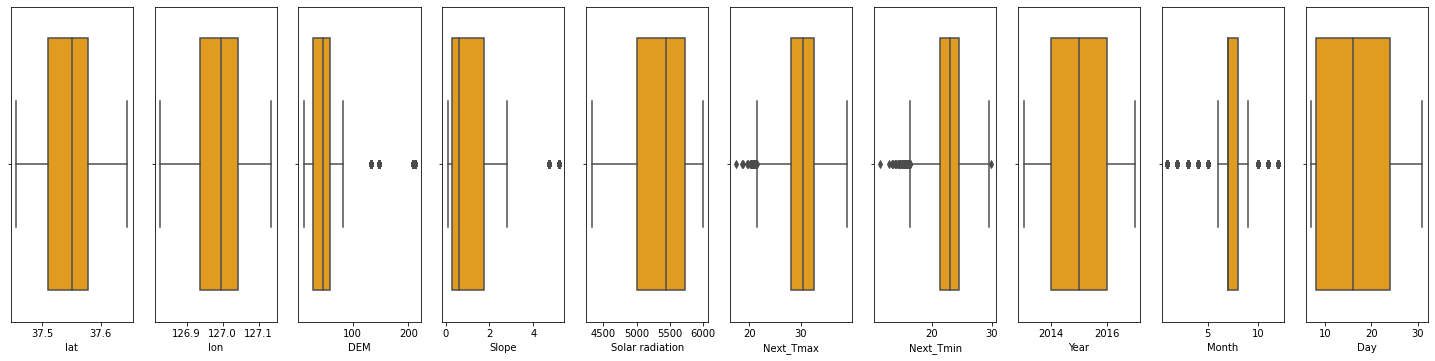

In [81]:
column_list = df3.columns.values
n_col = 31
n_row = 25
plt.figure(figsize = (2*n_col,4*n_col))
for i in range(len(column_list)):
  plt.subplot(n_row,n_col,i+1)
  sns.boxplot(df[column_list[i]],color='orange',orient='h')
  plt.tight_layout()

few outliers are present in most of the above columns.

### Removing the outliers

In [82]:
#with z-score technique

from scipy.stats import zscore
import numpy as np
z_n = np.abs(zscore(df))
z_n.shape

(7588, 26)

In [83]:
threshold = 3

df_new = df[(z_n<threshold).all(axis=1)]
print(df.shape)
print(df_new.shape)

#printing the total number of dropped rows
print(df.shape[0]-df_new.shape[0])

(7588, 26)
(6739, 26)
849


### percentage of data loss

In [84]:
loss_perc = (df.shape[0]-df_new.shape[0])/df.shape[0]*100
print("data loss percentage:{:.2f}%".format(loss_perc))

data loss percentage:11.19%


Its a big dataset and loss of 11% data is still not bad.
So,we can proceed for further.

### Dividing the data into features and vectors

In [97]:
#for Next_Tmax
y_1 = df_new[["Next_Tmax"]]
x_1 = df_new.drop(["Next_Tmax"],axis=1)

#for Next_Tmin
y_2 = df_new[["Next_Tmin"]]
x_2 = df_new.drop(["Next_Tmin"],axis=1)

#### Checking with multicollinearity

In [98]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif_value(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [99]:
calc_vif_value(x_1)

,variables,VIF
0,Present_Tmax,3.046881e+02
1,Present_Tmin,3.459581e+02
2,LDAPS_RHmin,1.025364e+02
3,LDAPS_RHmax,3.644028e+02
4,LDAPS_Tmax_lapse,8.196625e+02
5,LDAPS_Tmin_lapse,1.012464e+03
6,LDAPS_WS,1.829268e+01
7,LDAPS_LH,6.832506e+00
8,LDAPS_CC1,1.022277e+01
9,LDAPS_CC2,1.373755e+01


In [100]:
calc_vif_value(x_2)

,variables,VIF
0,Present_Tmax,3.138735e+02
1,Present_Tmin,3.223009e+02
2,LDAPS_RHmin,1.017048e+02
3,LDAPS_RHmax,3.646018e+02
4,LDAPS_Tmax_lapse,9.582948e+02
5,LDAPS_Tmin_lapse,7.910698e+02
6,LDAPS_WS,1.845344e+01
7,LDAPS_LH,6.952944e+00
8,LDAPS_CC1,1.027320e+01
9,LDAPS_CC2,1.374791e+01


SO,for both cases all values are in desirable range.

### checking with Skewness

In [101]:
df.skew().sort_values()

LDAPS_RHmax        -0.845264
Month              -0.703092
LDAPS_Tmin_lapse   -0.574035
Solar radiation    -0.524325
Next_Tmin          -0.393662
Present_Tmin       -0.353822
Next_Tmax          -0.334842
lon                -0.289048
Present_Tmax       -0.257069
LDAPS_Tmax_lapse   -0.222349
Year                0.013575
lat                 0.085377
Day                 0.245563
LDAPS_RHmin         0.301396
LDAPS_CC1           0.456716
LDAPS_CC2           0.473929
LDAPS_CC3           0.639649
LDAPS_LH            0.662971
LDAPS_CC4           0.663815
LDAPS_WS            1.553926
Slope               1.559050
DEM                 1.721617
LDAPS_PPT1          5.305906
LDAPS_PPT2          5.710360
LDAPS_PPT3          6.356670
LDAPS_PPT4          6.681256
dtype: float64

### Transforming data to eliminate skewness

In [102]:
#for "Next_Tmin"

from sklearn.preprocessing import power_transform
x_1 = power_transform(x_1)
x_1[:5]

array([[-4.72363165e-01, -8.34287511e-01,  2.61440568e-01,
         3.48222361e-01, -6.74803172e-01, -3.57311058e-01,
         1.76870697e-01,  3.49992388e-01, -3.07446611e-01,
        -4.25527874e-01, -4.60838622e-01, -5.12476043e-01,
        -5.25369934e-01, -4.84794441e-01, -4.61889329e-01,
        -4.14444478e-01,  5.67879077e-14, -1.96844387e-02,
         1.85439250e+00,  1.32777608e+00,  1.89168677e+00,
        -8.13229163e-01, -2.55351296e-15, -5.75809956e-01,
         1.42556435e+00],
       [ 6.71403102e-01, -7.52246702e-01, -1.70332184e-01,
         2.61118120e-01, -3.56274696e-02,  1.09008360e-01,
        -5.74616516e-01, -1.66810082e-01, -3.48673842e-01,
        -1.92022015e-01, -4.74101330e-01, -5.32673530e-01,
        -5.25369934e-01, -4.84794441e-01, -4.61889329e-01,
        -4.14444478e-01,  5.67879077e-14,  5.04958238e-01,
         6.97038113e-02, -3.75858300e-01,  1.43107721e+00,
        -2.80710481e-01, -2.55351296e-15, -5.75809956e-01,
         1.42556435e+00],
    

In [103]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_1 = sc.fit_transform(x_1)
x_1[:5]

array([[-0.47236316, -0.83428751,  0.26144057,  0.34822236, -0.67480317,
        -0.35731106,  0.1768707 ,  0.34999239, -0.30744661, -0.42552787,
        -0.46083862, -0.51247604, -0.52536993, -0.48479444, -0.46188933,
        -0.41444448,  1.20928834, -0.01968444,  1.8543925 ,  1.32777608,
         1.89168677, -0.81322916, -1.42804815, -0.57580996,  1.42556435],
       [ 0.6714031 , -0.7522467 , -0.17033218,  0.26111812, -0.03562747,
         0.10900836, -0.57461652, -0.16681008, -0.34867384, -0.19202202,
        -0.47410133, -0.53267353, -0.52536993, -0.48479444, -0.46188933,
        -0.41444448,  1.20928834,  0.50495824,  0.06970381, -0.3758583 ,
         1.43107721, -0.28071048, -1.42804815, -0.57580996,  1.42556435],
       [ 0.55875498, -0.03065966, -0.44083679, -0.71734774,  0.05215648,
         0.36106457, -0.25208311, -1.37833674, -0.4292563 , -0.16528958,
        -0.22254681, -0.44307662, -0.52536993, -0.48479444, -0.46188933,
        -0.41444448,  0.67436449,  0.84404859, -0

In [104]:
x_n1 = pd.DataFrame(x_1)   #rechecking with skewness
x_n1.skew()

0    -0.033180
1    -0.022294
2    -0.014095
3    -0.103320
4    -0.012837
5    -0.027814
6     0.007615
7    -0.030736
8     0.065308
9     0.050023
10    0.094449
11    0.142061
12    1.617538
13    1.820237
14    1.995359
15    2.267954
16    0.089949
17   -0.191511
18    0.038830
19    0.233799
20   -0.172156
21   -0.022753
22    0.014854
23    0.039744
24   -0.033392
dtype: float64

In [105]:
#for "Next_Tmin"

from sklearn.preprocessing import power_transform
x_2 = power_transform(x_2)
x_2[:5]

array([[-4.72363165e-01, -8.34287511e-01,  2.61440568e-01,
         3.48222361e-01, -6.74803172e-01, -3.57311058e-01,
         1.76870697e-01,  3.49992388e-01, -3.07446611e-01,
        -4.25527874e-01, -4.60838622e-01, -5.12476043e-01,
        -5.25369934e-01, -4.84794441e-01, -4.61889329e-01,
        -4.14444478e-01,  5.67879077e-14, -1.96844387e-02,
         1.85439250e+00,  1.32777608e+00,  1.89168677e+00,
        -5.34586246e-01, -2.55351296e-15, -5.75809956e-01,
         1.42556435e+00],
       [ 6.71403102e-01, -7.52246702e-01, -1.70332184e-01,
         2.61118120e-01, -3.56274696e-02,  1.09008360e-01,
        -5.74616516e-01, -1.66810082e-01, -3.48673842e-01,
        -1.92022015e-01, -4.74101330e-01, -5.32673530e-01,
        -5.25369934e-01, -4.84794441e-01, -4.61889329e-01,
        -4.14444478e-01,  5.67879077e-14,  5.04958238e-01,
         6.97038113e-02, -3.75858300e-01,  1.43107721e+00,
        -6.26576827e-02, -2.55351296e-15, -5.75809956e-01,
         1.42556435e+00],
    

In [106]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_2 = sc.fit_transform(x_2)
x_2[:5]

array([[-0.47236316, -0.83428751,  0.26144057,  0.34822236, -0.67480317,
        -0.35731106,  0.1768707 ,  0.34999239, -0.30744661, -0.42552787,
        -0.46083862, -0.51247604, -0.52536993, -0.48479444, -0.46188933,
        -0.41444448,  1.20928834, -0.01968444,  1.8543925 ,  1.32777608,
         1.89168677, -0.53458625, -1.42804815, -0.57580996,  1.42556435],
       [ 0.6714031 , -0.7522467 , -0.17033218,  0.26111812, -0.03562747,
         0.10900836, -0.57461652, -0.16681008, -0.34867384, -0.19202202,
        -0.47410133, -0.53267353, -0.52536993, -0.48479444, -0.46188933,
        -0.41444448,  1.20928834,  0.50495824,  0.06970381, -0.3758583 ,
         1.43107721, -0.06265768, -1.42804815, -0.57580996,  1.42556435],
       [ 0.55875498, -0.03065966, -0.44083679, -0.71734774,  0.05215648,
         0.36106457, -0.25208311, -1.37833674, -0.4292563 , -0.16528958,
        -0.22254681, -0.44307662, -0.52536993, -0.48479444, -0.46188933,
        -0.41444448,  0.67436449,  0.84404859, -0

In [107]:
x_n1 = pd.DataFrame(x_2)   #rechecking with skewness
x_n1.skew()

0    -0.033180
1    -0.022294
2    -0.014095
3    -0.103320
4    -0.012837
5    -0.027814
6     0.007615
7    -0.030736
8     0.065308
9     0.050023
10    0.094449
11    0.142061
12    1.617538
13    1.820237
14    1.995359
15    2.267954
16    0.089949
17   -0.191511
18    0.038830
19    0.233799
20   -0.172156
21   -0.036159
22    0.014854
23    0.039744
24   -0.033392
dtype: float64

The skewness has been reduced compared to previous values.

In [110]:
from sklearn.preprocessing import power_transform  #Next_Tmax
y_1 = power_transform(y_1)

from sklearn.preprocessing import power_transform  #Next_Tmin
y_2 = power_transform(y_2)

In [111]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
y_1 = sc.fit_transform(y_1)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
y_2 = sc.fit_transform(y_2)

### Selecting a best random state for a)Next_Tmax

In [112]:
#importing a necessary libraries
from sklearn.linear_model import BayesianRidge 
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

#Evaluating model performance
# Now data is preprocessed and we can go for selecting best random state
Max_score = 0
maxRS = 0 #best random state value for max r2_score
for i in range(1,200):
  x_train,x_test,y_train,y_test = train_test_split(x_1,y_1,test_size =.20,random_state = i)
  Bay = BayesianRidge()
  Bay.fit(x_train,y_train)
  predic = Bay.predict(x_test)
  acc = r2_score(y_test,predic)
  if acc > Max_score:
    Max_score = acc
    maxRS = i
print("Best R2_score is ",Max_score," on Random state ",maxRS)

Best R2_score is  0.8178059829995403  on Random state  84


In [116]:
x_train, x_test, y_train, y_test = train_test_split(x_1, y_1,test_size =.20,random_state=84)

In [117]:
print(x_train.shape,y_train.shape)

(5391, 25) (5391, 1)


In [118]:
print(x_test.shape,y_test.shape)

(1348, 25) (1348, 1)


In [119]:
#importing metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [120]:
#to predict the capacity we can consider Linearregression model

from sklearn.linear_model import LinearRegression 
LR = LinearRegression()
LR.fit(x_train,y_train)
predic_1 = LR.predict(x_test)
print("r2_score is {:0.3f}".format(r2_score(y_test,predic_1)))
print("mse is {:0.3f}".format(mean_squared_error(y_test,predic_1)))
print("rmse is {:0.3f}".format(mean_squared_error(y_test,predic_1,squared=False)))
print("mae is {:0.3f}".format(mean_absolute_error(y_test,predic_1)))

r2_score is 0.818
mse is 0.189
rmse is 0.435
mae is 0.336


In [121]:
from sklearn.model_selection import cross_val_score

In [122]:
#funtion to check accuracy of model using cross validation score

def model_accuracy(model,X_train=x_train,y_train=y_train):
    accuracies = cross_val_score(estimator = model, X = x_train, y = y_train, cv = 10) #CVS
    print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
    #print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

In [123]:
model_accuracy(LR)

Accuracy: 77.67 %


In [124]:
#using BayesianRidge model 
from sklearn.linear_model import BayesianRidge 
Bay = BayesianRidge()
Bay.fit(x_train,y_train)
predic_2 = Bay.predict(x_test)
print("r2_score is {:0.3f}".format(r2_score(y_test,predic_2)))
print("mse is {:0.3f}".format(mean_squared_error(y_test,predic_2)))
print("rmse is {:0.3f}".format(mean_squared_error(y_test,predic_2,squared=False)))
print("mae is {:0.3f}".format(mean_absolute_error(y_test,predic_2)))

r2_score is 0.818
mse is 0.189
rmse is 0.435
mae is 0.336


In [125]:
model_accuracy(Bay)

Accuracy: 77.67 %


In [126]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor()
RF.fit(x_train,y_train)
predic_3 = RF.predict(x_test)
print("r2_score is {:0.3f}".format(r2_score(y_test,predic_3)))
print("mse is {:0.3f}".format(mean_squared_error(y_test,predic_3)))
print("rmse is {:0.3f}".format(mean_squared_error(y_test,predic_3,squared=False)))
print("mae is {:0.3f}".format(mean_absolute_error(y_test,predic_3)))

r2_score is 0.916
mse is 0.088
rmse is 0.296
mae is 0.223


In [127]:
model_accuracy(RF)

Accuracy: 89.26 %


In [128]:
#using Decisiontree regressor
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor()
DT.fit(x_train,y_train)
predic_4 = DT.predict(x_test)
print("r2_score is {:0.3f}".format(r2_score(y_test,predic_4)))
print("mse is {:0.3f}".format(mean_squared_error(y_test,predic_4)))
print("rmse is {:0.3f}".format(mean_squared_error(y_test,predic_4,squared=False)))
print("mae is {:0.3f}".format(mean_absolute_error(y_test,predic_4)))

r2_score is 0.804
mse is 0.203
rmse is 0.451
mae is 0.329


In [129]:
model_accuracy(DT)

Accuracy: 75.87 %


So,out of all these models RandomForestRegressor model has more accuracy(even after checking with CVS) and least rmse value. So, I will take my final model as RandomForestRegressor.

### Hyper Paramter tuning

In [131]:
from sklearn.model_selection import GridSearchCV

params_list = {'bootstrap':[True,False],
              #  'criterion':["squared_error","absolute_error","poisson"],
               'max_features' :['auto','sqrt','log2'],
               'max_leaf_nodes':[2,3,4,None]
              }
GCV = GridSearchCV(RandomForestRegressor(),params_list,cv=5,scoring="neg_root_mean_squared_error")
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'max_leaf_nodes': [2, 3, 4, None]},
             scoring='neg_root_mean_squared_error')

In [134]:
#now predicting with best parameters
GCV_predic = GCV.best_estimator_.predict(x_test)

#getting the r2_score
#r2_score(y_test,GCV_predic)
model_accuracy(GCV.best_estimator_)

Accuracy: 91.84 %


In [135]:
import joblib
joblib.dump(GCV.best_estimator_,"Temperature_Forecast_Project_using_ML1.pkl")

['Temperature_Forecast_Project_using_ML1.pkl']

###  Selecting a best random state for b)Next_Tmin

In [113]:
#importing a necessary libraries
from sklearn.linear_model import BayesianRidge 
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

#Evaluating model performance
# Now data is preprocessed and we can go for selecting best random state
Max_score = 0
maxRS = 0 #best random state value for max r2_score
for i in range(1,200):
  x_train,x_test,y_train,y_test = train_test_split(x_2,y_2,test_size =.20,random_state = i)
  Bay = BayesianRidge()
  Bay.fit(x_train,y_train)
  predic = Bay.predict(x_test)
  acc = r2_score(y_test,predic)
  if acc > Max_score:
    Max_score = acc
    maxRS = i
print("Best R2_score is ",Max_score," on Random state ",maxRS)

Best R2_score is  0.8576518953871839  on Random state  176


In [137]:
x_train, x_test, y_train, y_test = train_test_split(x_2, y_2,test_size =.20,random_state=176)

In [138]:
print(x_train.shape,y_train.shape)

(5391, 25) (5391, 1)


In [139]:
print(x_test.shape,y_test.shape)

(1348, 25) (1348, 1)


In [140]:
#to predict the capacity we can consider Linearregression model

from sklearn.linear_model import LinearRegression 
LR = LinearRegression()
LR.fit(x_train,y_train)
predic_1 = LR.predict(x_test)
print("r2_score is {:0.3f}".format(r2_score(y_test,predic_1)))
print("mse is {:0.3f}".format(mean_squared_error(y_test,predic_1)))
print("rmse is {:0.3f}".format(mean_squared_error(y_test,predic_1,squared=False)))
print("mae is {:0.3f}".format(mean_absolute_error(y_test,predic_1)))

r2_score is 0.858
mse is 0.152
rmse is 0.389
mae is 0.313


In [142]:
#using BayesianRidge model 
from sklearn.linear_model import BayesianRidge 
Bay = BayesianRidge()
Bay.fit(x_train,y_train)
predic_2 = Bay.predict(x_test)
print("r2_score is {:0.3f}".format(r2_score(y_test,predic_2)))
print("mse is {:0.3f}".format(mean_squared_error(y_test,predic_2)))
print("rmse is {:0.3f}".format(mean_squared_error(y_test,predic_2,squared=False)))
print("mae is {:0.3f}".format(mean_absolute_error(y_test,predic_2)))

r2_score is 0.858
mse is 0.152
rmse is 0.389
mae is 0.313


In [144]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor()
RF.fit(x_train,y_train)
predic_3 = RF.predict(x_test)
print("r2_score is {:0.3f}".format(r2_score(y_test,predic_3)))
print("mse is {:0.3f}".format(mean_squared_error(y_test,predic_3)))
print("rmse is {:0.3f}".format(mean_squared_error(y_test,predic_3,squared=False)))
print("mae is {:0.3f}".format(mean_absolute_error(y_test,predic_3)))

r2_score is 0.919
mse is 0.086
rmse is 0.294
mae is 0.227


In [146]:
#using Decisiontree regressor
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor()
DT.fit(x_train,y_train)
predic_4 = DT.predict(x_test)
print("r2_score is {:0.3f}".format(r2_score(y_test,predic_4)))
print("mse is {:0.3f}".format(mean_squared_error(y_test,predic_4)))
print("rmse is {:0.3f}".format(mean_squared_error(y_test,predic_4,squared=False)))
print("mae is {:0.3f}".format(mean_absolute_error(y_test,predic_4)))

r2_score is 0.807
mse is 0.205
rmse is 0.453
mae is 0.336


Out of all these models RandomForestRegressor has least rmse value.
So,will take as my final model.

### Hyper Paramter tuning

In [148]:
from sklearn.model_selection import GridSearchCV

params_list = {'bootstrap':[True,False],
              #  'criterion':["squared_error","absolute_error","poisson"],
               'max_features' :['auto','sqrt','log2'],
               'max_leaf_nodes':[2,3,4,None]
              }
GCV = GridSearchCV(RandomForestRegressor(),params_list,cv=5,scoring="neg_root_mean_squared_error")
GCV.fit(x_train,y_train)

#printing the best parameter
GCV.best_params_

{'bootstrap': False, 'max_features': 'log2', 'max_leaf_nodes': None}

In [150]:
#now predicting with best parameters
GCV_predic = GCV.best_estimator_.predict(x_test)

#getting the r2_score
print(r2_score(y_test,GCV_predic))
# model_accuracy(GCV.best_estimator_)
print("mse is {:0.3f}".format(mean_squared_error(y_test,GCV_predic)))
print("rmse is {:0.3f}".format(mean_squared_error(y_test,GCV_predic,squared=False)))
print("mae is {:0.3f}".format(mean_absolute_error(y_test,GCV_predic)))

0.9362537516745418
mse is 0.068
rmse is 0.261
mae is 0.200


In [151]:
import joblib
joblib.dump(GCV.best_estimator_,"Temperature_Forecast_Project_using_ML2.pkl")

['Temperature_Forecast_Project_using_ML2.pkl']